In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [80]:
df=pd.read_csv("Mall_Customers.csv")
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [81]:
x=df.iloc[:,3:5]
x.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

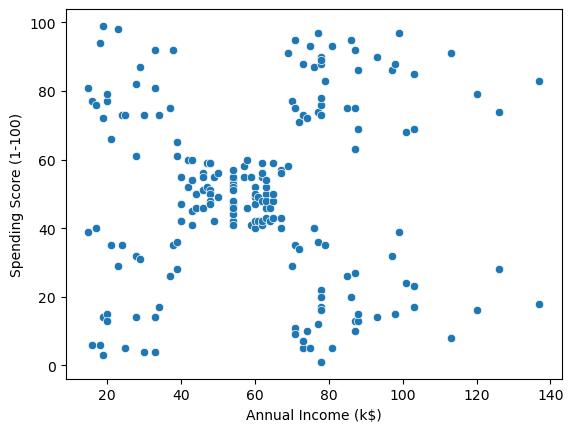

In [82]:
sns.scatterplot(data=x,x="Annual Income (k$)",y="Spending Score (1-100)")

In [83]:
# Data scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_new=ss.fit_transform(x)
x_new

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [84]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i) # hyperparameter tuning
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)

In [85]:
wcss

[269.69101219276394,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 57.381747460227864,
 46.91711742566163,
 42.004276238393075,
 36.43505137320087,
 30.94800295615749]

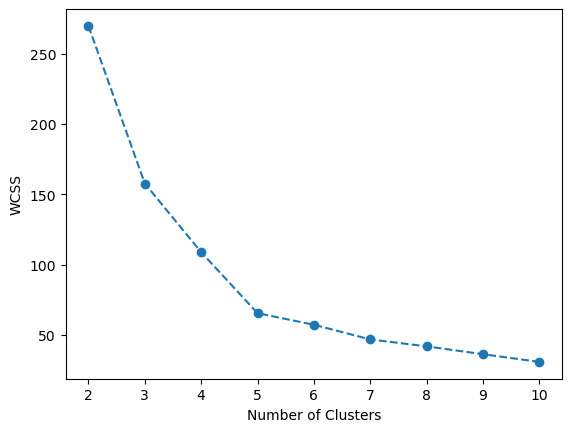

In [86]:
plt.plot(range(2,11),wcss,"o--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [87]:
kmeans=KMeans(n_clusters=4) # hyperparameter tuning
kmeans.fit(x_new)
ypredicted_lables=kmeans.predict(x_new)
ypredicted_lables

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [88]:
df["class"]=ypredicted_lables
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),class
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


In [89]:
kmeans.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [-0.46948398,  0.2437994 ],
       [ 1.00919971, -1.22553537]])

In [90]:
kmeans.cluster_centers_[:,1]

array([ 1.23950275, -1.13696536,  0.2437994 , -1.22553537])

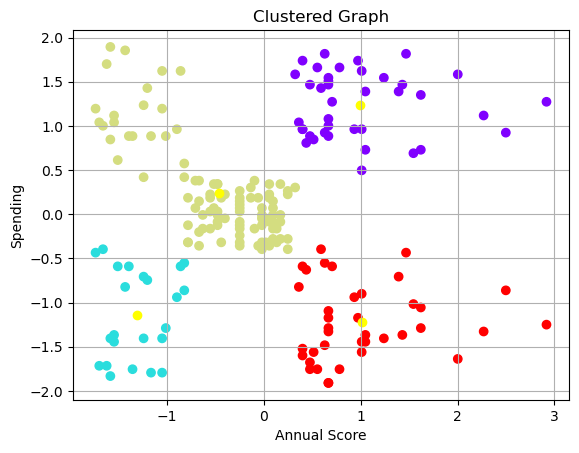

In [91]:
plt.scatter(x_new[:,0],x_new[:,1],c=ypredicted_lables,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="yellow")
plt.xlabel("Annual Score")
plt.ylabel("Spending")
plt.title("Clustered Graph")
plt.grid()
plt.show()

In [92]:
x_new.shape

(200, 2)

In [108]:
df["class"].value_counts()

class
2    100
0     39
3     38
1     23
Name: count, dtype: int64